# CNN Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

ticker_symbol = 'JPM'

jpmorgan_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(jpmorgan_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240414  24456900
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306313  19624200


In [3]:
print(jpmorgan_data.index)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)


In [4]:
jpmorgan_data.reset_index(inplace=True)

print(jpmorgan_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000
1 2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2 2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
3 2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240414  24456900
4 2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306313  19624200


In [5]:
jpmorgan_data['Date'] = pd.to_datetime(jpmorgan_data['Date'])
jpmorgan_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.240414,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.306313,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,125.963974,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,126.405388,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200


In [6]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
jpmorgan_merged = pd.merge(date_range_df, jpmorgan_data, on='Date', how='left')
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    jpmorgan_merged[metric].interpolate(method='linear', inplace=True)

jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691410,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216012,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06


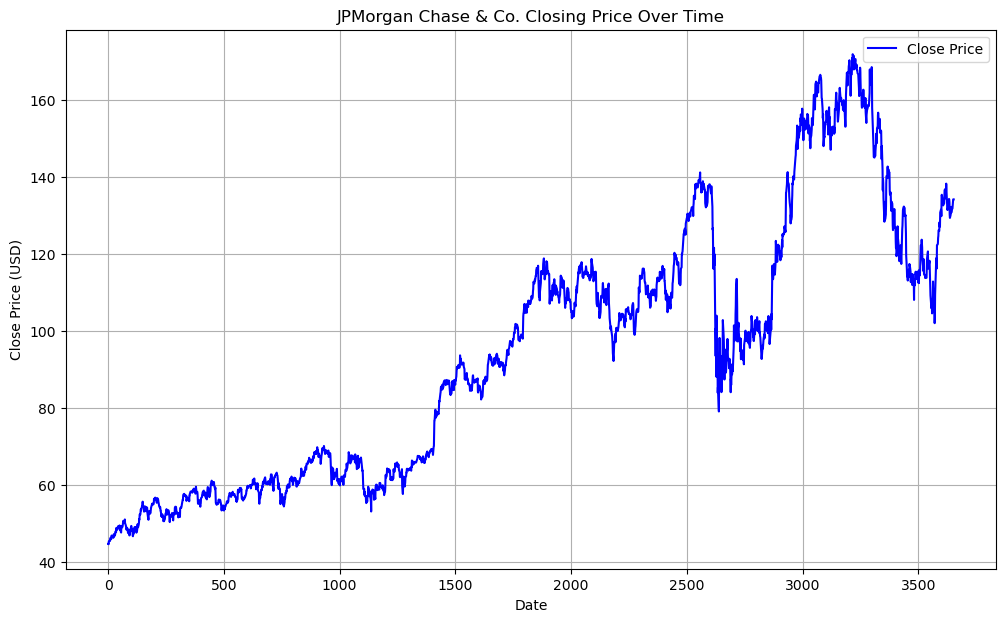

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(jpmorgan_merged['Close'], label='Close Price', color='blue')
plt.title('JPMorgan Chase & Co. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = jpmorgan_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))
# Flatten the convolution output to feed it into a dense layer
model.add(Flatten())
# Output layer
model.add(Dense(units=1))   # Assuming a regression problem

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])

# Print the model summary to review its architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 1s - 24ms/step - loss: 0.0156 - mean_absolute_error: 0.0820 - val_loss: 0.0104 - val_mean_absolute_error: 0.0989
Epoch 2/50
47/47 - 0s - 2ms/step - loss: 5.0218e-04 - mean_absolute_error: 0.0163 - val_loss: 7.6090e-04 - val_mean_absolute_error: 0.0231
Epoch 3/50
47/47 - 0s - 2ms/step - loss: 3.1710e-04 - mean_absolute_error: 0.0118 - val_loss: 7.0701e-04 - val_mean_absolute_error: 0.0221
Epoch 4/50
47/47 - 0s - 2ms/step - loss: 3.0717e-04 - mean_absolute_error: 0.0114 - val_loss: 7.6395e-04 - val_mean_absolute_error: 0.0232
Epoch 5/50
47/47 - 0s - 2ms/step - loss: 3.0442e-04 - mean_absolute_error: 0.0113 - val_loss: 7.1982e-04 - val_mean_absolute_error: 0.0224
Epoch 6/50
47/47 - 0s - 2ms/step - loss: 3.0315e-04 - mean_absolute_error: 0.0111 - val_loss: 5.9773e-04 - val_mean_absolute_error: 0.0202
Epoch 7/50
47/47 - 0s - 2ms/step - loss: 2.9101e-04 - mean_absolute_error: 0.0111 - val_loss: 6.4208e-04 - val_mean_absolute_error: 0.0210
Epoch 8/50
47/47 - 0s - 2ms/step -

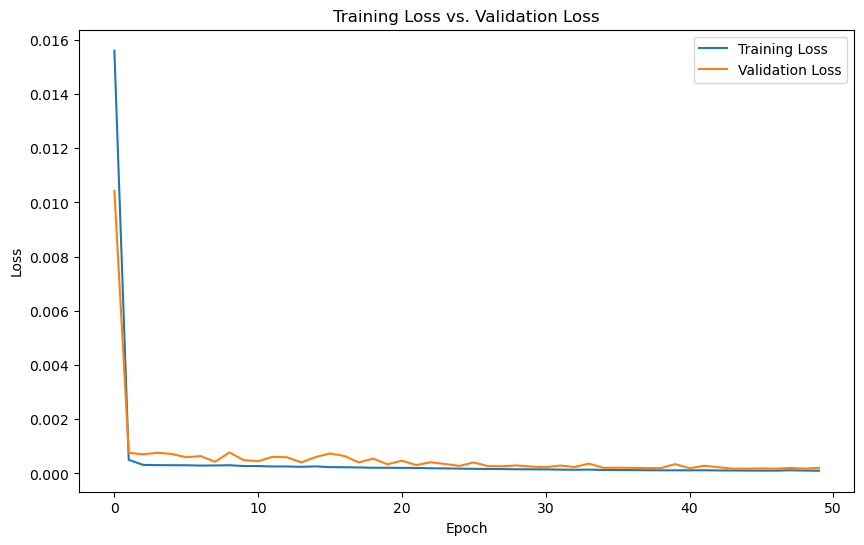

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 1.3449677746968727
Train MAE: 0.839032742607174
Train MAPE: 0.8960208983961665
Test RMSE: 2.1304369211431506
Test MAE: 1.570457813837757
Test MAPE: 1.2250531616101819


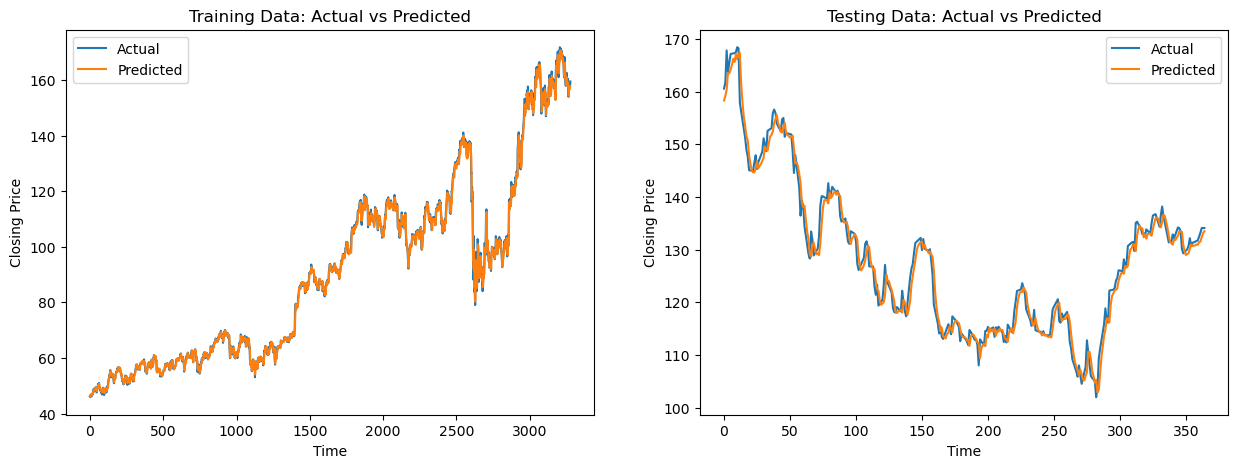

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

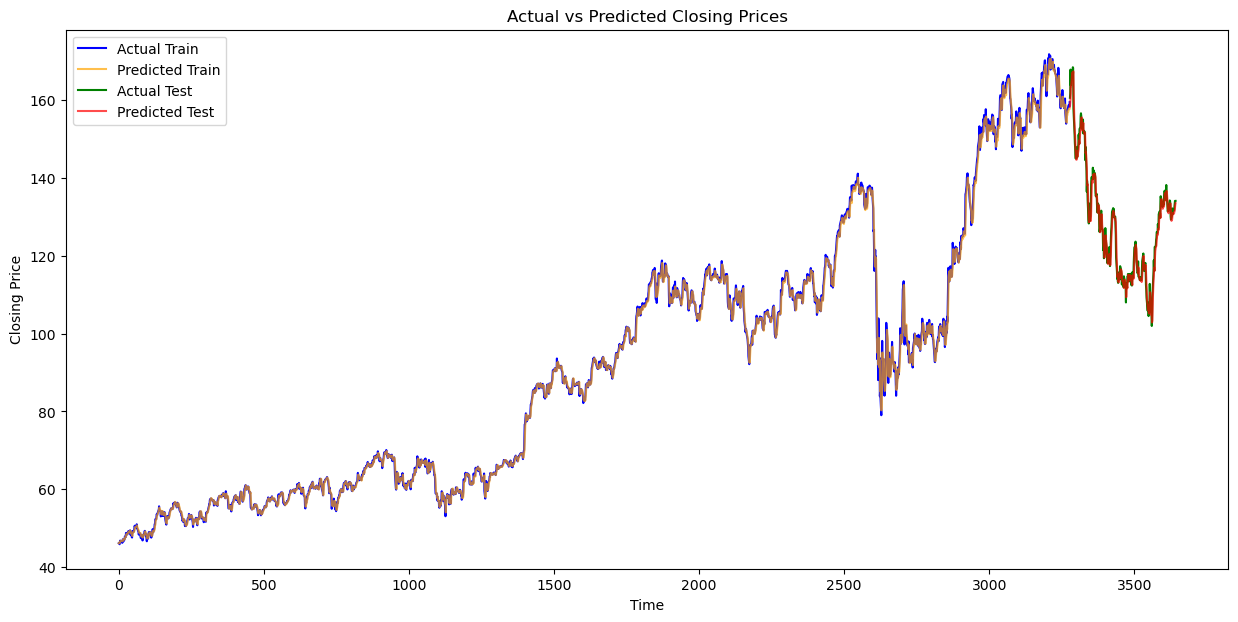

In [16]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM Model

In [17]:
import pandas as pd
import numpy as np

In [18]:
import yfinance as yf

ticker_symbol = 'JPM'

jpmorgan_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(jpmorgan_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240414  24456900
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306313  19624200


In [19]:
print(jpmorgan_data.index)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)


In [20]:
jpmorgan_data.reset_index(inplace=True)

print(jpmorgan_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000
1 2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2 2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
3 2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240414  24456900
4 2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306313  19624200


In [21]:
jpmorgan_data['Date'] = pd.to_datetime(jpmorgan_data['Date'])
jpmorgan_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.240414,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.306313,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,125.963974,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,126.405388,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200


In [22]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
jpmorgan_merged = pd.merge(date_range_df, jpmorgan_data, on='Date', how='left')
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    jpmorgan_merged[metric].interpolate(method='linear', inplace=True)

jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691410,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216012,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06


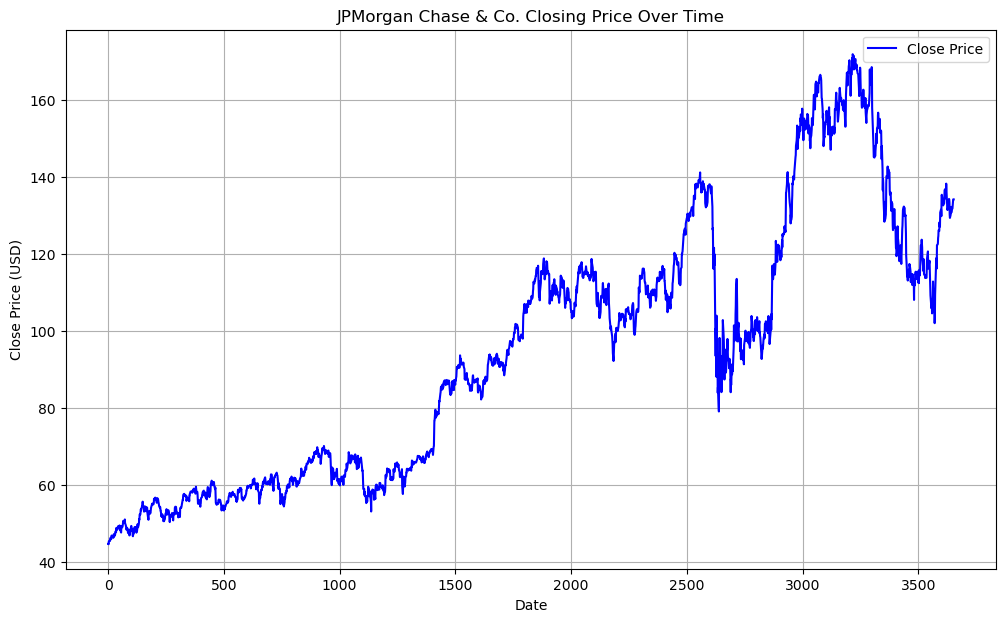

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(jpmorgan_merged['Close'], label='Close Price', color='blue')
plt.title('JPMorgan Chase & Co. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = jpmorgan_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=64, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=False))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 69ms/step - loss: 0.0192 - mean_absolute_error: 0.0920 - val_loss: 0.0010 - val_mean_absolute_error: 0.0272
Epoch 2/50
47/47 - 1s - 12ms/step - loss: 5.1928e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0012 - val_mean_absolute_error: 0.0298
Epoch 3/50
47/47 - 1s - 11ms/step - loss: 3.9485e-04 - mean_absolute_error: 0.0125 - val_loss: 6.0066e-04 - val_mean_absolute_error: 0.0208
Epoch 4/50
47/47 - 0s - 8ms/step - loss: 3.5779e-04 - mean_absolute_error: 0.0126 - val_loss: 5.1316e-04 - val_mean_absolute_error: 0.0191
Epoch 5/50
47/47 - 0s - 6ms/step - loss: 3.4430e-04 - mean_absolute_error: 0.0122 - val_loss: 5.2633e-04 - val_mean_absolute_error: 0.0194
Epoch 6/50
47/47 - 0s - 6ms/step - loss: 3.3494e-04 - mean_absolute_error: 0.0119 - val_loss: 5.0934e-04 - val_mean_absolute_error: 0.0190
Epoch 7/50
47/47 - 0s - 5ms/step - loss: 3.2999e-04 - mean_absolute_error: 0.0118 - val_loss: 4.6550e-04 - val_mean_absolute_error: 0.0179
Epoch 8/50
47/47 - 0s - 5ms/step - l

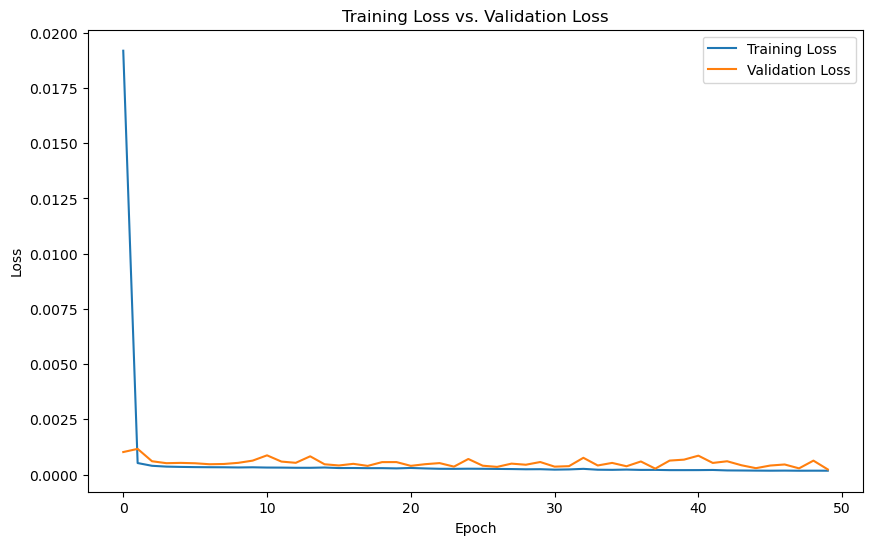

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 1.6899110346196717
Train MAE: 1.0935368639728948
Train MAPE: 1.2055896847990266
Test RMSE: 2.580126144837749
Test MAE: 1.9225966466616278
Test MAPE: 1.5231716604465781


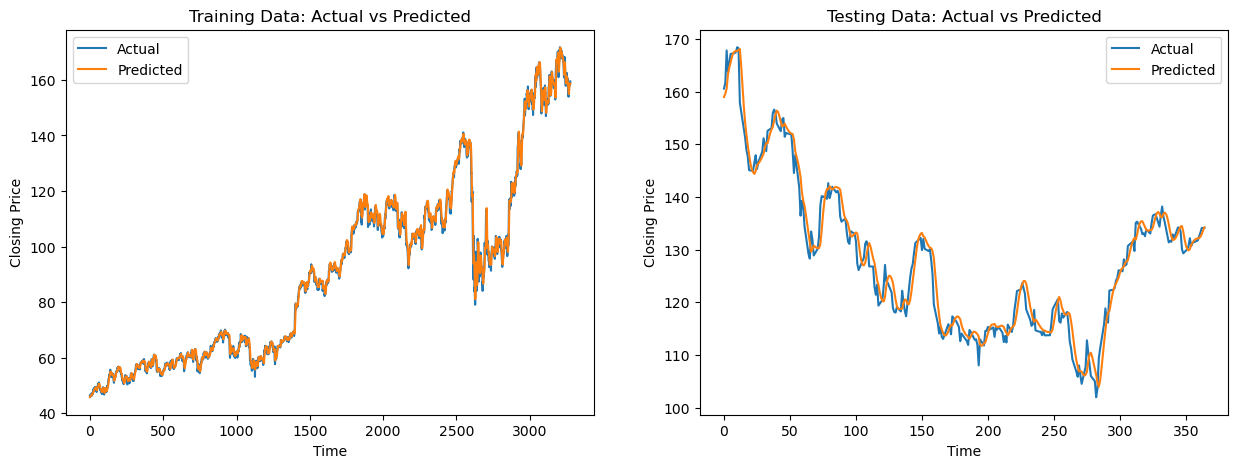

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

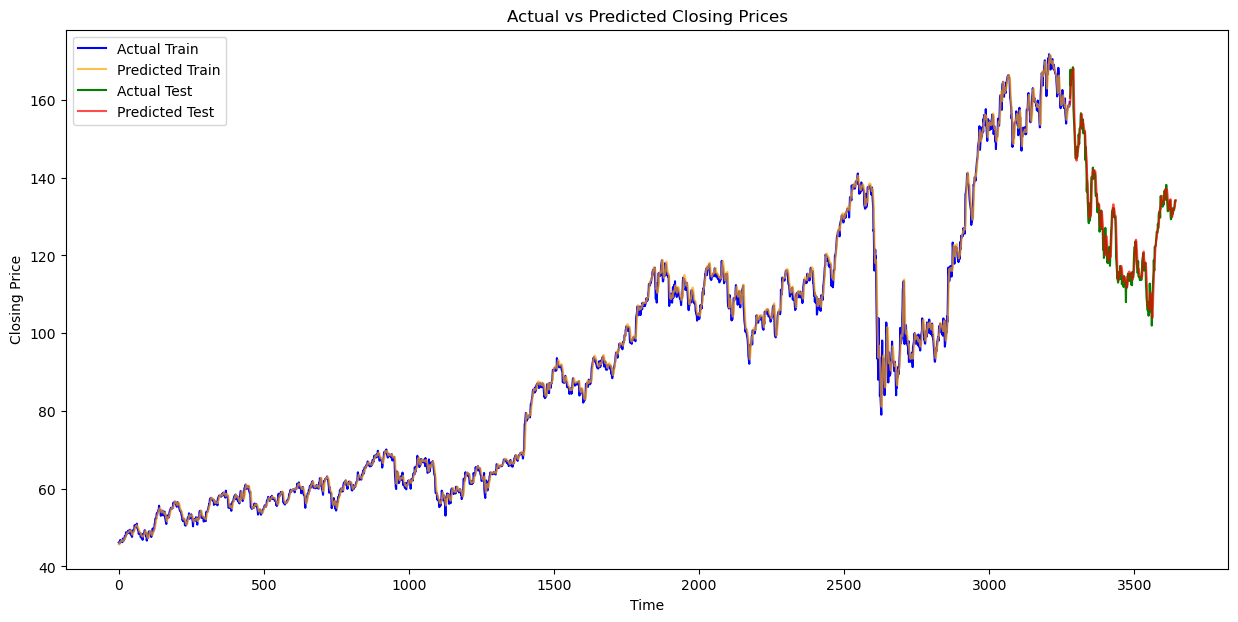

In [32]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# CNN-LSTM Model

In [33]:
import pandas as pd
import numpy as np

In [34]:
import yfinance as yf

ticker_symbol = 'JPM'

jpmorgan_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(jpmorgan_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240414  24456900
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306313  19624200


In [35]:
print(jpmorgan_data.index)

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)


In [36]:
jpmorgan_data.reset_index(inplace=True)

print(jpmorgan_data.head())

        Date       Open       High        Low      Close  Adj Close    Volume
0 2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000
1 2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625530  24227700
2 2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203812  24487700
3 2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240414  24456900
4 2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306313  19624200


In [37]:
jpmorgan_data['Date'] = pd.to_datetime(jpmorgan_data['Date'])
jpmorgan_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.240414,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.306313,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,125.963974,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,126.405388,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200


In [38]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
jpmorgan_merged = pd.merge(date_range_df, jpmorgan_data, on='Date', how='left')
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    jpmorgan_merged[metric].interpolate(method='linear', inplace=True)

jpmorgan_merged.bfill(inplace=True)
jpmorgan_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.691410,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.691410,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.625530,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.203812,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.216012,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.096214,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,127.825432,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,128.669815,9.292500e+06


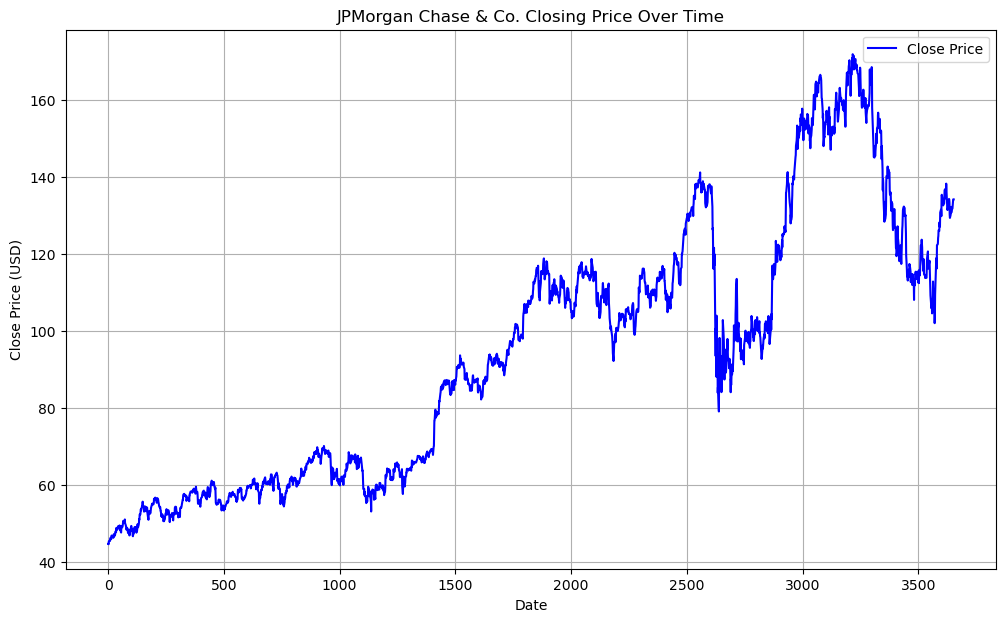

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(jpmorgan_merged['Close'], label='Close Price', color='blue')
plt.title('JPMorgan Chase & Co. Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = jpmorgan_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Bidirectional, TimeDistributed, Flatten

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

# model.add((Flatten()))

# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=64, return_sequences=False, activation='tanh'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

# Model summary to see the architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,025 (97.75 KB)

 Trainable params: 25,025 (97.75 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 4s - 79ms/step - loss: 0.0137 - mean_absolute_error: 0.0761 - val_loss: 0.0010 - val_mean_absolute_error: 0.0274
Epoch 2/50
47/47 - 0s - 9ms/step - loss: 3.2627e-04 - mean_absolute_error: 0.0122 - val_loss: 4.2625e-04 - val_mean_absolute_error: 0.0175
Epoch 3/50
47/47 - 0s - 7ms/step - loss: 2.5343e-04 - mean_absolute_error: 0.0103 - val_loss: 3.9522e-04 - val_mean_absolute_error: 0.0167
Epoch 4/50
47/47 - 0s - 5ms/step - loss: 2.4604e-04 - mean_absolute_error: 0.0101 - val_loss: 4.3080e-04 - val_mean_absolute_error: 0.0175
Epoch 5/50
47/47 - 0s - 5ms/step - loss: 2.4351e-04 - mean_absolute_error: 0.0101 - val_loss: 3.7005e-04 - val_mean_absolute_error: 0.0160
Epoch 6/50
47/47 - 0s - 6ms/step - loss: 2.3797e-04 - mean_absolute_error: 0.0100 - val_loss: 3.7226e-04 - val_mean_absolute_error: 0.0160
Epoch 7/50
47/47 - 0s - 6ms/step - loss: 2.4468e-04 - mean_absolute_error: 0.0098 - val_loss: 4.5105e-04 - val_mean_absolute_error: 0.0180
Epoch 8/50
47/47 - 0s - 6ms/step -

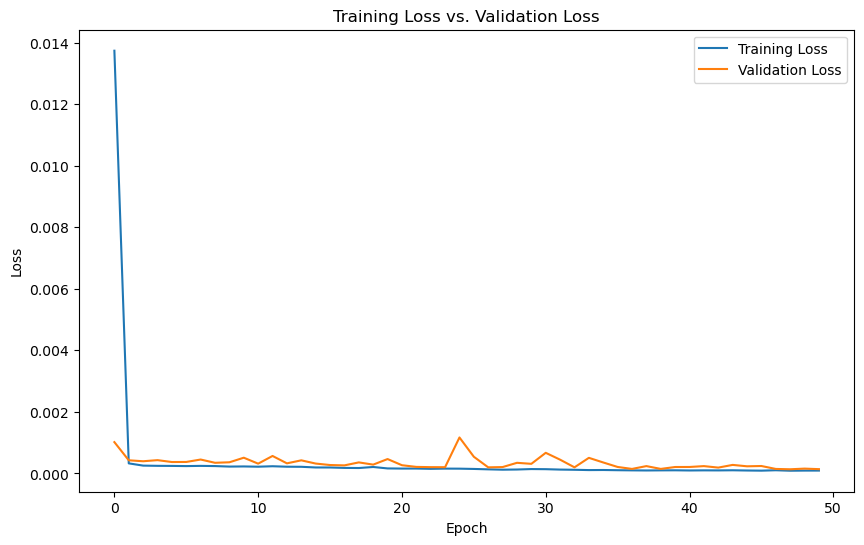

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train RMSE: 1.2602166250346831
Train MAE: 0.8026625548093718
Train MAPE: 0.8836783866886707
Test RMSE: 1.9555056425742756
Test MAE: 1.4194953326220927
Test MAPE: 1.1210823582812695


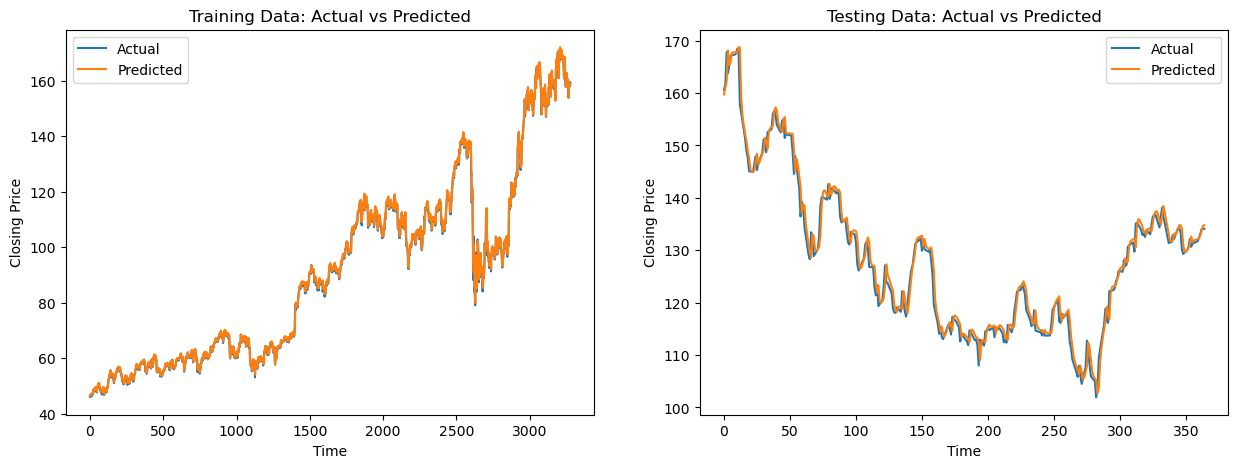

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

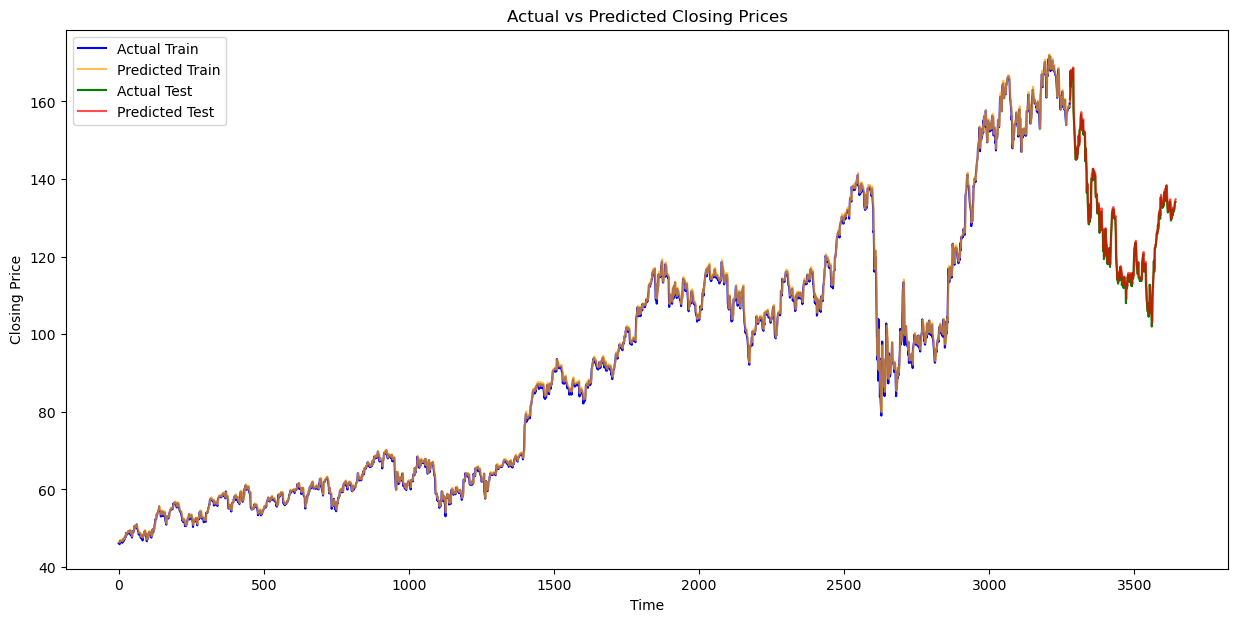

In [49]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()